# Capstone Project Week 1:  The Battle of the Neighborhoods

*Data Science Capstone - IBM Data Science Professional Certificate on Coursera*

This file, and other associated files, make up my contribution to the final Peer Reviewed Assignment for the Coursera Capstone Project for Applied Data Science Capstone. This was my final module in the IBM Data Science Professional Certificate programme

## Section 1:  Introduction

In this section I will present my problem that I came up with that can be solved utilizing the relevant FourSquare location data.

### Background

A global financial institution has made a decision to open up a new headquarters and to relocate its operational functions and relevant staff from New York City to the Research Triangle Park location in North Carolina.  The reasons given by the finanical company in its latest press release are as follows:  1) Develop a business continuity model for its Americas based business, 2) Realize per annum savings on real estate and operating costs, and 3) Create a pipeline of incoming talent from the highly respected local universities in the new area.

The financial company has set a target of relocating at least 50% of their current employees in New York to the new location along with their respective jobs to ensure a seamless transition, minimal interruption to current business, and for knowledge retention and training in the new location. However, it has come to the attention of the CEO that a majority of the employees have been reluctant to commit and sign contracts to move to the new location as they do not have relevant location data and information required to make such an important decision.  The CEO has asked for analysis to be done on the surrounding cities that can be presented back to the employees which should help them decide to 1) commit or not to relocate, and 2) choose a safe city to live with their families.

### Project Idea

The financial company has enlisted its top data scientist to run a project to collect, analyze, and visualize data that will be presented to the employees with the relevant information needed to make a decsion.  This data scientist has determined that by utilizing venue and location data from FourSquare, analyzing and comparing crime statistics per city, and analyzing local housing data it will be possible to provide the employees with information that they can use to decide on the best place to move themselves and their families.


The data scientist will begin running his project with these three areas of focus, which were themes that were collected from the feedback and open questions provided by the impacted employees:

1. Access to restaurants, shopping, and entertainment per city
2. Crime statistics per city
3. Housing statistics per city


The project approach by the data scientist is to take the most populated cities around the company's new location and perform the following:

1. Locate the top rated nearby restaurants, shopping locations, and/or entertainment venues 
2. Determine the historical crime rates within a predetermined distance of each city and predict future crime
3. Compare and contrast the cost of housing amongst the cities


### Who is this solution targeted at?

The solution is targeted at the employees of the financial company.  They want more information on the new location before they commit to move themselves and their families, they want to choose a safe location, and they want to choose a location that accessible to good restaurants, shopping and entertainment. The solution is critical to the success of the company and ensuring they meet their target of relocating at least 50% of it's operational workforce.



## Section 2:  Data Description

In this section I will describe how the relevant data was acquired and why it is needed to solve the problem.  There are 4 data sets that I will explain as follows:

1. The Most Populated Cities Near Research Triangle Park
2. FourSquare List of Venues and Ratings Per City
3. Wake County North Carolina Crime Statistics


### 1. Most Populated Cities Near Research Triangle Park

The first data element required is to find the most populated cities that surround Research Triangle Park, or the company's new location.  In order to accomplish that, we will use the information located on the U.S. Cities Database webpage (url=https://simplemaps.com/data/us-cities) to determine what cities we will be analyzing in order to provide our employees with the necessary information required to help make their decision.

We will accomplish this by downloading a CSV file of U.S. City data containing the population of each city in the U.S.  We will then need to filter out by state the non-North Carolina data, in order to focus on just the cities in North Carolina. The csv file will then be imported into our Python Jupyter Notebook to be cleaned and analyzed.  The first step is to ensure we import the required libraries to help us transform the data into a dataframe, and we call upon **Pandas** to do this.  We will also import other libraries here for use in later sections, such as **Requests** that will help us make API calls to FourSquare for location data.

Once the data is imported and we've creatd our Pandas dataframe, we then clean it to remove columns that we will not need. Finally, we want to only select and show the population data for the cities in Wake County, which is the same county as where our company has relocated.  Once that is retrieved, we then sort the cities by population size to obtain our top 5 cities by population in Wake County.  This will become our sample size to be used to offer to our employees five different cities to which they could relocate, all within the same county as the new company location.

Our top 5 cities in Wake County by population size are as follows:

1. Raleigh
2. Cary
3. Apex
4. Wake Forest
5. Holly Springs


In [1]:
#Importing Libraries such as Pandas & Requests
!pip install lxml

import requests 
import pandas as pd 
import numpy as np 
import random 

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 


from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    

from pandas.io.json import json_normalize


from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors


print('Libraries imported.')

Libraries imported.


In [2]:
# The code was removed by Watson Studio for sharing.

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,Aberdeen,Aberdeen,NC,North Carolina,37125,Moore,37125,Moore,35.1351,-79.4319,7625,300,polygon,False,True,America/New_York,3,28315,1840015433
1,Advance,Advance,NC,North Carolina,37059,Davie,37059,Davie,35.9468,-80.4045,726,39,polygon,False,False,America/New_York,3,27006,1840024909
2,Ahoskie,Ahoskie,NC,North Carolina,37091,Hertford,37091,Hertford,36.2843,-76.9898,4789,432,polygon,False,True,America/New_York,3,27910,1840015277
3,Alamance,Alamance,NC,North Carolina,37001,Alamance,37001,Alamance,36.0283,-79.4894,1015,515,polygon,False,True,America/New_York,3,27201 27215,1840017736
4,Albemarle,Albemarle,NC,North Carolina,37167,Stanly,37167,Stanly,35.3601,-80.1919,16900,363,polygon,False,True,America/New_York,3,28001 28002,1840013444


In [3]:
#Cleaning the data by removing unnecessary columns from the dataframe
df_data_2=df_data_1.drop(['city_ascii','state_name','county_fips','county_name','county_fips_all','density', 'source','incorporated','military', 'timezone','ranking','zips', "id"], axis=1)
df_data_2.head()


,city,state_id,county_name_all,lat,lng,population
0,Aberdeen,NC,Moore,35.1351,-79.4319,7625
1,Advance,NC,Davie,35.9468,-80.4045,726
2,Ahoskie,NC,Hertford,36.2843,-76.9898,4789
3,Alamance,NC,Alamance,36.0283,-79.4894,1015
4,Albemarle,NC,Stanly,35.3601,-80.1919,16900


In [4]:
#Select all cities that have "Wake" in the county name, and sort by largest population
df3 = df_data_2[df_data_2['county_name_all'].str.contains('Wake',regex=False)]

#Sort by largest populations, and show the Top 5 cities to create the initial dataframe
df4=df3.sort_values(by=['population'], ascending=False)
df5 = df4.loc[df4['population'] >= 35000]
df5


,city,state_id,county_name_all,lat,lng,population
524,Raleigh,NC,Wake|Durham,35.8324,-78.6438,1018336
107,Cary,NC,Wake|Chatham,35.7817,-78.8175,165904
10,Apex,NC,Wake,35.7246,-78.8698,50451
680,Wake Forest,NC,Wake|Franklin,35.9634,-78.5139,42269
310,Holly Springs,NC,Wake,35.6540,-78.8403,35223


In [5]:
# Install Anaconda to import Folium library for map creation
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                       

In [6]:
# Create Folium Map using Research Triangle Park as the central location
rtp_map = folium.Map(location=[35.8992, -78.8636], zoom_start=13) # generate map centred around RTP

# add a red circle marker to represent the company's new location
folium.features.CircleMarker(
    [35.8992, -78.8636],
    radius=40,
    color='red',
    popup='New Location',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(rtp_map)

# add the cities as blue circle markers
for lat, lng, label in zip(df5.lat, df5.lng, df5.city):
    folium.features.CircleMarker(
        [lat, lng],
        radius=15,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(rtp_map)

# display map
rtp_map

### 2. FourSquare List of Venues & Ratings Per City

The next data element required is to source from FourSquare a list of venues within each city.  This information can be utilized by the employees to start to determine which city best fits the interests of them and their families.  By exploring each city's "town center" location within FourSquare, we can show to the employees the proximity of such places of interest, ratings of each of the venues, and the variety and diversity of options available to them if they moved here.

*(For this exercise and to avoid repetition, we will use the city of "Cary" as an example to start.  The other four cities would follow the same methodology and process.)*

We'll start the acquisition of this data by entering our FourSquare credentials and making an API call to obtain the venues (limited to 30) that are located within a 17,000 meter radius of the city center of Cary.  We then retreive a JSON file that gives us the venue details with associated categories.  It is preferred to keep the venues generic at this point and include many different types of categories as we can eventually take a more micro approach later based on employee request (i.e. focus only on restaurants).  

The JSON file will need to be converted into a Pandas dataframe, and we'll then need to filter and run a function for the "venue categories" on each row of data to get the actual categories that the venues belong to.  This is important as we'll want to analyze the type of venues later on in order to provide our employess with a summary of the area.  The ratings of each venue based on user feedback is also critical, and this is not included in the original JSON file from the initial API call to FourSquare. Therefore, we place another API call to retrieve the ratings per venue, and then iterate this process for each venue and add the data into the pre-existing dataframe.  

With all of this completed, we are then able to start to analyze our data as we know have 30 venues within a certain distance from the city center of Cary.  We can look at proximity, variety of venues, average ratings, top 5 rated venues, and other such measurements to make a determination on this particular city as an option to relocate to.



In [7]:
#FourSquare Credentials
CLIENT_ID = 'IXCLKIPVQMLITPFTACO4WM1YQM1MKLG15EBOJP2TBXY2XOCT' 
CLIENT_SECRET = 'TSPHXCU0GMB2Q03ABSI3KB30S3BGV4AFTDPKUM0IIAWJ5TPR'
VERSION = '20180604'
LIMIT = 30

In [8]:
# Obtain the coordinates for the center of town/city
address = '2410 Walnut St, Cary, NC'
radius = 17000
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

35.7709747 -78.7626341


In [9]:
# Define the FourSquare URL
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=IXCLKIPVQMLITPFTACO4WM1YQM1MKLG15EBOJP2TBXY2XOCT&client_secret=TSPHXCU0GMB2Q03ABSI3KB30S3BGV4AFTDPKUM0IIAWJ5TPR&ll=35.7709747,-78.7626341&v=20180604&radius=17000&limit=30'

In [10]:
#Send the GET request for a list of venues surrounding the city center and examine the results
results = requests.get(url).json()
'There are {} venues around this locaton.'.format(len(results['response']['groups'][0]['items']))

'There are 30 venues around this locaton.'

In [11]:
# Get relevant part of JSON file
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '5446fccc498e95fbd0b7b67f',
  'name': 'Harris Teeter',
  'location': {'address': '885 Walnut St',
   'lat': 35.774908179373874,
   'lng': -78.76486595528766,
   'labeledLatLngs': [{'label': 'display',
     'lat': 35.774908179373874,
     'lng': -78.76486595528766}],
   'distance': 482,
   'postalCode': '27511',
   'cc': 'US',
   'city': 'Cary',
   'state': 'NC',
   'country': 'United States',
   'formattedAddress': ['885 Walnut St', 'Cary, NC 27511', 'United States']},
  'categories': [{'id': '52f2ab2ebcbc57f1066b8b46',
    'name': 'Supermarket',
    'pluralName': 'Supermarkets',
    'shortName': 'Supermarket',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-5446fccc498e95fbd0b7b67f-0'

In [12]:
# Convert into a Pandas Dataframe
dataframe = json_normalize(items) 

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Harris Teeter,Supermarket,885 Walnut St,US,Cary,United States,NaN,482,"[885 Walnut St, Cary, NC 27511, United States]","[{'label': 'display', 'lat': 35.77490817937387...",35.774908,-78.764866,NaN,27511,NC,5446fccc498e95fbd0b7b67f
1,Trader Joe's,Grocery Store,1393 Kildaire Farm Rd,US,Cary,United States,at SE Cary Pkwy,2192,"[1393 Kildaire Farm Rd (at SE Cary Pkwy), Cary...","[{'label': 'display', 'lat': 35.75867477519291...",35.758675,-78.781586,NaN,27511,NC,4ad8d3a6f964a5200a1521e3
2,The Butcher's Market,Butcher,1225 Kildaire Farm Rd,US,Cary,United States,at Farmington Woods Dr,2048,[1225 Kildaire Farm Rd (at Farmington Woods Dr...,"[{'label': 'display', 'lat': 35.76290740860443...",35.762907,-78.783024,NaN,27511,NC,4b5b86d7f964a520cf0429e3
3,Sassool,Mediterranean Restaurant,1347 Kildaire Farm Rd,US,Cary,United States,Cary Parkway,2151,"[1347 Kildaire Farm Rd (Cary Parkway), Cary, N...","[{'label': 'display', 'lat': 35.75974047542053...",35.759740,-78.782013,NaN,27511,NC,5669feb1498efb2d802f5b00
4,Bond Brothers Beer Company,Brewery,202 E Cedar St,US,Cary,United States,NaN,2346,"[202 E Cedar St, Cary, NC 27511, United States]","[{'label': 'display', 'lat': 35.78814951575549...",35.788150,-78.777706,NaN,27511,NC,56b8cb4f38fa514c692c1b06
5,Duck Donuts,Donut Shop,"100 Wrenn Drive, Suite 101",US,Cary,United States,Kildaire Farm Rd,2030,"[100 Wrenn Drive, Suite 101 (Kildaire Farm Rd)...","[{'label': 'display', 'lat': 35.7651926, 'lng'...",35.765193,-78.783952,NaN,27511,NC,549435ca498e6e8081b69ee5
6,World Market,Furniture / Home Store,2410 Walnut St,US,Cary,United States,NaN,2631,"[2410 Walnut St, Cary, NC 27518, United States]","[{'label': 'display', 'lat': 35.7525886, 'lng'...",35.752589,-78.744326,NaN,27518,NC,4ae9c5c2f964a52042b621e3
7,Goodberry's Frozen Custard,Ice Cream Shop,1146 Kildaire Farm Rd,US,Cary,United States,at Farmington Woods Dr,1965,[1146 Kildaire Farm Rd (at Farmington Woods Dr...,"[{'label': 'display', 'lat': 35.76578903565382...",35.765789,-78.783435,NaN,27511,NC,4b4aa1e3f964a520f38b26e3
8,Triangle Aquatic Center,Gym Pool,275 Convention Dr,US,Cary,United States,at Cary Town Blvd. & SE Maynard Rd.,886,[275 Convention Dr (at Cary Town Blvd. & SE Ma...,"[{'label': 'display', 'lat': 35.77572527395797...",35.775725,-78.754762,NaN,27511,NC,4b2fa3ddf964a52052ed24e3
9,Corbett's Burgers & Soda Bar,Burger Joint,126 Kilmayne Dr,US,Cary,United States,at Kildaire Farm Rd,1843,"[126 Kilmayne Dr (at Kildaire Farm Rd), Cary, ...","[{'label': 'display', 'lat': 35.77015940111849...",35.770159,-78.783017,NaN,27511,NC,51eee32d498e179b3b40adbb


In [13]:
# Obtain user ratings for each venue by placing a premium call to the FourSquare API
venues_ids= dataframe_filtered['id']
ratings=[]
for venue_id in venues_ids.values.tolist():
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        venues_rating=result['response']['venue']['rating']
        ratings=ratings+[venues_rating]
    except IndexError:
        print('No data available for id=',ID)
ratings

[8.8,
 9.4,
 9.2,
 9.2,
 9.2,
 8.9,
 9.3,
 8.8,
 8.5,
 8.8,
 8.7,
 8.9,
 8.7,
 9.3,
 9.3,
 9.2,
 8.4,
 8.5,
 8.6,
 8.4,
 8.7,
 8.9,
 9.0,
 9.2,
 8.5,
 9.1,
 8.9,
 8.7,
 8.9,
 9.2]

In [14]:
dataframe_filtered.insert(1, "ratings", [8.8,
 9.4,
 9.2,
 9.2,
 9.2,
 8.9,
 9.3,
 8.8,
 8.5,
 8.8,
 8.7,
 8.9,
 8.7,
 9.3,
 9.3,
 9.2,
 8.4,
 8.5,
 8.6,
 8.4,
 8.7,
 8.9,
 9.0,
 9.2,
 8.5,
 9.1,
 8.9,
 8.7,
 8.9,
 9.2], True)
dataframe_filtered

,name,ratings,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Harris Teeter,8.8,Supermarket,885 Walnut St,US,Cary,United States,NaN,482,"[885 Walnut St, Cary, NC 27511, United States]","[{'label': 'display', 'lat': 35.77490817937387...",35.774908,-78.764866,NaN,27511,NC,5446fccc498e95fbd0b7b67f
1,Trader Joe's,9.4,Grocery Store,1393 Kildaire Farm Rd,US,Cary,United States,at SE Cary Pkwy,2192,"[1393 Kildaire Farm Rd (at SE Cary Pkwy), Cary...","[{'label': 'display', 'lat': 35.75867477519291...",35.758675,-78.781586,NaN,27511,NC,4ad8d3a6f964a5200a1521e3
2,The Butcher's Market,9.2,Butcher,1225 Kildaire Farm Rd,US,Cary,United States,at Farmington Woods Dr,2048,[1225 Kildaire Farm Rd (at Farmington Woods Dr...,"[{'label': 'display', 'lat': 35.76290740860443...",35.762907,-78.783024,NaN,27511,NC,4b5b86d7f964a520cf0429e3
3,Sassool,9.2,Mediterranean Restaurant,1347 Kildaire Farm Rd,US,Cary,United States,Cary Parkway,2151,"[1347 Kildaire Farm Rd (Cary Parkway), Cary, N...","[{'label': 'display', 'lat': 35.75974047542053...",35.759740,-78.782013,NaN,27511,NC,5669feb1498efb2d802f5b00
4,Bond Brothers Beer Company,9.2,Brewery,202 E Cedar St,US,Cary,United States,NaN,2346,"[202 E Cedar St, Cary, NC 27511, United States]","[{'label': 'display', 'lat': 35.78814951575549...",35.788150,-78.777706,NaN,27511,NC,56b8cb4f38fa514c692c1b06
5,Duck Donuts,8.9,Donut Shop,"100 Wrenn Drive, Suite 101",US,Cary,United States,Kildaire Farm Rd,2030,"[100 Wrenn Drive, Suite 101 (Kildaire Farm Rd)...","[{'label': 'display', 'lat': 35.7651926, 'lng'...",35.765193,-78.783952,NaN,27511,NC,549435ca498e6e8081b69ee5
6,World Market,9.3,Furniture / Home Store,2410 Walnut St,US,Cary,United States,NaN,2631,"[2410 Walnut St, Cary, NC 27518, United States]","[{'label': 'display', 'lat': 35.7525886, 'lng'...",35.752589,-78.744326,NaN,27518,NC,4ae9c5c2f964a52042b621e3
7,Goodberry's Frozen Custard,8.8,Ice Cream Shop,1146 Kildaire Farm Rd,US,Cary,United States,at Farmington Woods Dr,1965,[1146 Kildaire Farm Rd (at Farmington Woods Dr...,"[{'label': 'display', 'lat': 35.76578903565382...",35.765789,-78.783435,NaN,27511,NC,4b4aa1e3f964a520f38b26e3
8,Triangle Aquatic Center,8.5,Gym Pool,275 Convention Dr,US,Cary,United States,at Cary Town Blvd. & SE Maynard Rd.,886,[275 Convention Dr (at Cary Town Blvd. & SE Ma...,"[{'label': 'display', 'lat': 35.77572527395797...",35.775725,-78.754762,NaN,27511,NC,4b2fa3ddf964a52052ed24e3
9,Corbett's Burgers & Soda Bar,8.8,Burger Joint,126 Kilmayne Dr,US,Cary,United States,at Kildaire Farm Rd,1843,"[126 Kilmayne Dr (at Kildaire Farm Rd), Cary, ...","[{'label': 'display', 'lat': 35.77015940111849...",35.770159,-78.783017,NaN,27511,NC,51eee32d498e179b3b40adbb


In [15]:
dataframe_filtered.shape

(30, 17)

In [16]:
# Describe the distance to see the average proximity of the venues from the city center
dataframe_filtered.distance.describe()

count      30.000000
mean     3253.566667
std      1593.050309
min       482.000000
25%      2073.750000
50%      2554.000000
75%      4581.500000
max      6246.000000
Name: distance, dtype: float64

In [17]:
# Describe the ratings to see if there is much variance in the values
dataframe_filtered.ratings.describe()

count    30.000000
mean      8.906667
std       0.298194
min       8.400000
25%       8.700000
50%       8.900000
75%       9.200000
max       9.400000
Name: ratings, dtype: float64

In [18]:
# What are the top 5 highest rated venues in the city?
dataframe_filtered.sort_values(by=['ratings'], ascending=False).head(5)


,name,ratings,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
1,Trader Joe's,9.4,Grocery Store,1393 Kildaire Farm Rd,US,Cary,United States,at SE Cary Pkwy,2192,"[1393 Kildaire Farm Rd (at SE Cary Pkwy), Cary...","[{'label': 'display', 'lat': 35.75867477519291...",35.758675,-78.781586,NaN,27511,NC,4ad8d3a6f964a5200a1521e3
6,World Market,9.3,Furniture / Home Store,2410 Walnut St,US,Cary,United States,NaN,2631,"[2410 Walnut St, Cary, NC 27518, United States]","[{'label': 'display', 'lat': 35.7525886, 'lng'...",35.752589,-78.744326,NaN,27518,NC,4ae9c5c2f964a52042b621e3
14,Lake Johnson Trail,9.3,Trail,NaN,US,Raleigh,United States,NaN,3583,"[Raleigh, NC 27606, United States]","[{'label': 'display', 'lat': 35.76448368526149...",35.764484,-78.723771,NaN,27606,NC,50008430e4b02f063c50e9d9
13,Lake Johnson Nature Park,9.3,Nature Preserve,Avent Ferry Rd,US,Raleigh,United States,NaN,3582,"[Avent Ferry Rd, Raleigh, NC 27606, United Sta...","[{'label': 'display', 'lat': 35.76447652566766...",35.764477,-78.723789,Southwest Raleigh,27606,NC,4d835baa509137047ca8665b
15,Cinebistro at Waverly Place,9.2,Multiplex,525 New Waverly Pl,US,Cary,United States,NaN,3763,"[525 New Waverly Pl, Cary, NC 27518, United St...","[{'label': 'display', 'lat': 35.73919057962183...",35.739191,-78.776818,NaN,27518,NC,55d6c321498ed45ed5c7cc39


In [19]:
# Which venue categories are there more of?
dataframe_filtered.groupby('categories')['name'].count().sort_values(ascending=False)[:10]

categories
Trail                       2
Nature Preserve             2
Mediterranean Restaurant    2
Coffee Shop                 2
Grocery Store               2
Gym                         1
Bakery                      1
Beer Garden                 1
Brewery                     1
Burger Joint                1
Name: name, dtype: int64

In [20]:
# What category of venue has the highest average rating?
dataframe_filtered.groupby('categories')['ratings'].mean().sort_values(ascending=False)[:10]

categories
Furniture / Home Store    9.30
Park                      9.20
Multiplex                 9.20
Bakery                    9.20
Brewery                   9.20
Butcher                   9.20
Trail                     9.10
Nature Preserve           9.10
Peruvian Restaurant       9.10
Grocery Store             9.05
Name: ratings, dtype: float64

### Initial Analysis & Visualization of the Data

The initial analysis of the collected data above shows that there are 30 rows of data (venues) with 17 attributes (categories).  The mean distance of each location from the city center is calcualted at 3,253 meters, or approximately 2 miles, and the average rating of each venue is 8.9.  This can be compared to other cities later on in order for our employees to decide what is the best option for the.

The top 5 highest rated venues are mostly either shopping venues or public parks/trails, catering more to someone who enjoys being "out and about" instead of staying home.  It can also be concluded that out of these 30 venues, there is good variety and diversity of category, as there are not more than two of each venue per category listed.  The non-food categories also seem to have a better rating than those venues associated with food, so it will be important later on to compare this to other cities in order to give our employees a view as to which city has the best "food" options.

The map below also shows the venue locations to the city center of Cary.

In [21]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around downtown Cary


# add Downtown Cary as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Dowtown',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

### 3. North Carolina Crime Data (2016)

This dataset is downloaded via a csv file from the Data.World website from Uniform Crime Reports at the following url = https://data.world/ucr/crime-in-us-2016-offenses-known-by-state-by-city/workspace/file?filename=Table_6_Offenses_Known_to_Law_Enforcement_North_Carolina_by_City_2016.xls.  The offenses known to law enforcement will provide data on the violent crimes of homicides, rape, robbery, aggravated assault, and property crimes of burglary, larceny/theft, motor vehicle thefts, and arson.   This dataset includes criminal offenses in the all cities and towns in North Carolina for the 2016 calendar year. The data is based on the UCRS (Uniform Crime Report System).

In [55]:
# Import Pandas library and data from website
import pandas as pd
df = pd.read_excel('https://query.data.world/s/olk63va67wdpednag7cr4zzeqecstx')


In [56]:
# Create headers for dataframe 
headers = ["City","Population","Violent Crime","Homicides","Rape Revised 1", "Rape","Robbery",
         "Aggravagted Assault","Property Crime","Burglary", "Larceny Theft","Motor Vehicle Theft","Arson",]
print("headers\n", headers)

df.columns = headers
df.head()

headers
 ['City', 'Population', 'Violent Crime', 'Homicides', 'Rape Revised 1', 'Rape', 'Robbery', 'Aggravagted Assault', 'Property Crime', 'Burglary', 'Larceny Theft', 'Motor Vehicle Theft', 'Arson']


,City,Population,Violent Crime,Homicides,Rape Revised 1,Rape,Robbery,Aggravagted Assault,Property Crime,Burglary,Larceny Theft,Motor Vehicle Theft,Arson
0,NORTH CAROLINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson
4,Aberdeen,7549,25,0,NaN,3,10,12,289,52,226,11,1


In [83]:
# Clean up dataframe and remove rows and columns
df2=df.drop(df.index[[0,1,2,3]])
df3=df2.drop('Rape Revised 1', axis=1)
df3.reset_index(drop=True, inplace=True)
df3.head()

,City,Population,Violent Crime,Homicides,Rape,Robbery,Aggravagted Assault,Property Crime,Burglary,Larceny Theft,Motor Vehicle Theft,Arson
0,Aberdeen,7549,25,0,3,10,12,289,52,226,11,1
1,Ahoskie,4883,43,2,3,8,30,291,81,201,9,0
2,Albemarle,16024,107,1,6,24,76,771,201,538,32,4
3,Angier,5097,14,0,2,2,10,129,62,59,8,3
4,Apex,47324,40,1,2,13,24,601,83,501,17,1


In [114]:
df4=df3.rename(columns={"Violent Crime": "Violent Crime Total", "Property Crime": "Property Crime Total"})
df4.head()

,City,Population,Violent Crime Total,Homicides,Rape,Robbery,Aggravagted Assault,Property Crime Total,Burglary,Larceny Theft,Motor Vehicle Theft,Arson
0,Aberdeen,7549,25,0,3,10,12,289,52,226,11,1
1,Ahoskie,4883,43,2,3,8,30,291,81,201,9,0
2,Albemarle,16024,107,1,6,24,76,771,201,538,32,4
3,Angier,5097,14,0,2,2,10,129,62,59,8,3
4,Apex,47324,40,1,2,13,24,601,83,501,17,1


In [115]:
df4.shape

(185, 12)

In [116]:
# Select only the cities that are being offered as choices to our employees
df5=df4.loc[df4['City'].isin(['Apex','Cary','Wake Forest','Holly Springs'])]
df5

,City,Population,Violent Crime Total,Homicides,Rape,Robbery,Aggravagted Assault,Property Crime Total,Burglary,Larceny Theft,Motor Vehicle Theft,Arson
4,Apex,47324,40,1,2,13,24,601,83,501,17,1
30,Cary,164835,151,1,20,68,62,1656,234,1363,59,7
72,Holly Springs,32862,9,0,1,2,6,295,45,245,5,0
161,Wake Forest,39996,54,0,3,11,40,954,77,866,11,2


In [120]:
df5.shape

(4, 12)

### Initial Analysis & Visualization of the Data

The initial analysis of the collected data above shows that there are 4 rows of data (city) with 12 attributes (cities). There aren't many datasets publicly available for North Carolina crime data and this was determined to be the best that could be found.  It is pretty basic, lacking many of the  details of the crimes such as times and dates they happened, but they do show our employees the level of crime across the four cities that they have to chose from to move to. .If the employee feedback results in gaining more detailed data, then this will need to be sent to the NC Department of Justice as a formal request to retrieve more implicit data.


In [99]:
# Use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

font = {'size'   : 14}
mpl.rc('font', **font)

Text(0.0, 1.0, 'Total Violent Crimes per City 2016')

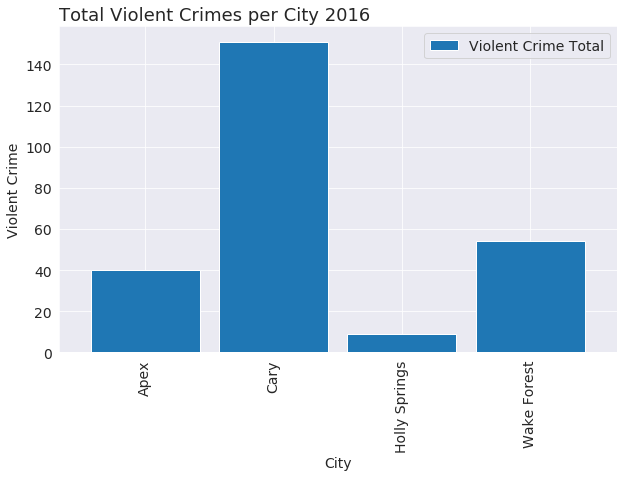

In [119]:
# Group the Crimes per city and produce a bar chart
df5.groupby('City').sum().plot(y = 'Violent Crime Total',
                                             kind='bar',
                                             figsize=(10,6),
                                             width=0.85,
                                             colormap='tab20')

plt.xlabel('City')
plt.ylabel('Violent Crime')
plt.title('Total Violent Crimes per City 2016', loc='left', fontsize=18)

Text(0.0, 1.0, 'Total Property Crimes per City 2016')

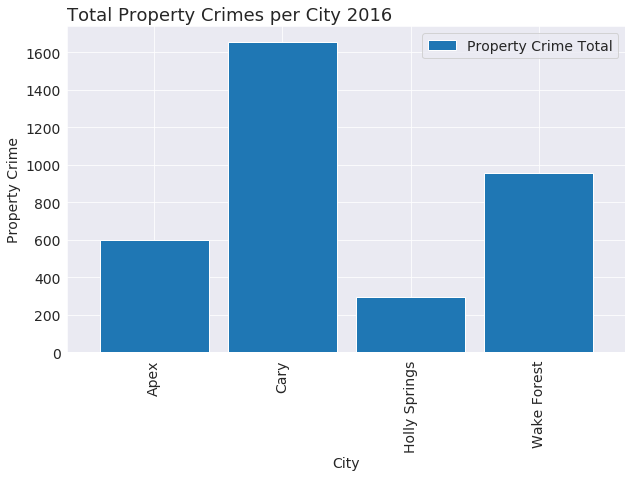

In [118]:
# Group the Crimes per city and produce a bar chart
df5.groupby('City').sum().plot(y = 'Property Crime Total', 
                                             kind='bar',
                                             figsize=(10,6),
                                             width=0.85,
                                             colormap='tab20')

plt.xlabel('City')
plt.ylabel('Property Crime')
plt.title('Total Property Crimes per City 2016', loc='left', fontsize=18)